## CPE 695:  HW 5

Chloe Quinto    
HW 5   
April 30 2020    
*I pledge my honor that I have abided by the Stevens Honor System* - Chloe Quinto  


### Pre-Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import random

In [2]:
noise_scale = 100
number_of_samples = 50 
x = 25 *(np.random.rand(number_of_samples,1)-0.8)
y = 5*x + 20*x**2+1*x**3+noise_scale*np.random.randn(number_of_samples,1)

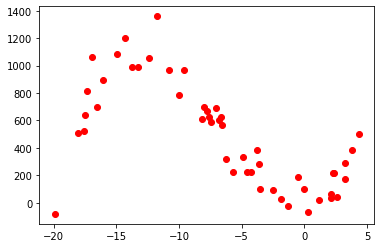

In [3]:
plt.plot(x,y,'ro')
plt.show()

Flatten np arrays to list 

In [4]:
x = np.array(x).flatten().tolist()
y = np.array(y).flatten().tolist()

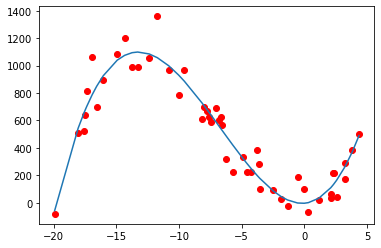

In [5]:
coeff = np.polyfit(x,y,3) 
poly = np.poly1d(coeff)

plt.plot(x,y, 'ro')
sortMe = np.sort(x) 

plt.plot(sortMe, poly(sortMe)) 
plt.show()

## 2. Genetic Algorithm 

1. Formula is y = ax<sup>3</sup> + bx<sup>2</sup> + cx+ d
2. Genes are a, b, c, and d
3. Chromosomes are [a,b,c,d]
4. For one array   
&nbsp;&nbsp;&nbsp; a. for every actual point(x,y)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i. Compute y'=ax<sup>3</sup> + bx<sup>2</sup> + cx+ d    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ii. Find the sum of (y-y')<sup>2</sup> over all    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; iii. Sum is your measure of "badness" (larger numbers are worse) 


In [6]:
def createChromosomes(): 
    '''
    Creates 100 six-element arrays of random numbers 
    '''
    chromosomes = []
    for i in range(100): 
        chromosome = [random.randint(0,100) for i in range(4)]
        chromosomes.append(chromosome)
    return chromosomes

In [7]:
def yval(i, chromosomes, x): 
    '''
    Calculates formula y = ax^3 + bx^2 + cx + d 
    '''
    return chromosomes[0]*(x[i]**3) + chromosomes[1]*(x[i]**2) + chromosomes[2]*(x[i])+ chromosomes[3]


In [52]:
def badnessScore(chromosomes): 
    '''
    Computes badness score 
    '''
    i, j = 0,1 
    points = []
    seen = set()
    while j < len(x): 
        
        y = yval(i, chromosomes, x)
        y_hat = yval(j, chromosomes, x)

        badness = (y - y_hat)**2 
        points.append((chromosomes, round(badness)))

        genes = sorted(points, key = lambda x: float(x[1]), reverse = False)
        j += 1 
        i += 1
    return genes[0]

In [76]:
def createMutations(genes): 
    '''
    Creates mutations on 9 new chromosomes 
    '''
    mutations = []
    curr = []

    for j in range(9): 
        new = genes.copy()
        rand_idx = random.randrange(len(new))
        rand_num = new[rand_idx]
        rand_float = random.uniform(0,1)
        new_num = round(rand_num * rand_float)
        new[rand_idx] = new_num
        curr.append(new)
    mutations.append(curr)
    curr = []
    return mutations

In [79]:
def main(): 
    '''
    Driver for GA algorithm 
    '''
    points = []
    best_arr = []
    seen = set()
    generation = 1
    chromosomes = createChromosomes()
    for i in range(generation):# for each generation 
        print("Generation ", i)
        best_arr = []
        for j in range(100): # for each 100 arrays
            bestGenes = badnessScore(chromosomes[j])# compute badness score  
            best_arr.append(bestGenes)
        # kep the 10 best arrays
        genes = sorted(best_arr, key = lambda x: float(x[1]), reverse = False)[:10]
        for h in range(len(genes)): #for each array, generate 9 new ones  
            print(genes[h][0])
            createMutations(genes[h][0])
            print("\n\n\n")



main()

Generation  0
[5, 56, 82, 89]




[9, 40, 44, 79]




[8, 86, 87, 21]




[7, 47, 0, 11]




[21, 82, 78, 97]




[29, 54, 4, 24]




[6, 43, 15, 7]




[2, 47, 77, 61]




[2, 21, 90, 53]




[11, 69, 99, 40]




